## Question 1

### (A）

$
\Delta{Y} = (5 - 61)- (71 - 65) = -62
$

Therefore, the diff-in-diff shows that moving water intake upstream leads to a decrease of 62 deaths per 10000 homes.

### (B)

In absence of treatment, average change in dependent variable (Y) would have been the same for both the treatment and control groups (Parallel Trends assumption)

## Question 2
### (A)

In [6]:
##Load the Data
newFunction = read.csv('NewFunction.csv')
str(newFunction)
summary (newFunction)

'data.frame':	80000 obs. of  4 variables:
 $ AdvertiserID: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Week        : int  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 ...
 $ Adoption    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CTR         : num  0.1123 0.0878 0.1323 0.121 0.1367 ...


  AdvertiserID        Week          Adoption        CTR           
 Min.   :    1   Min.   :-2.00   Min.   :0.0   Min.   :0.0003629  
 1st Qu.: 2501   1st Qu.:-1.25   1st Qu.:0.0   1st Qu.:0.0543613  
 Median : 5000   Median :-0.50   Median :0.5   Median :0.0741272  
 Mean   : 5000   Mean   :-0.50   Mean   :0.5   Mean   :0.0800176  
 3rd Qu.: 7500   3rd Qu.: 0.25   3rd Qu.:1.0   3rd Qu.:0.1018463  
 Max.   :10000   Max.   : 1.00   Max.   :1.0   Max.   :0.2372558  

Check whether the treatment & control are parallel weeks prior to the treatment.(week -2 and week -1)

In [19]:

## Diff-in-Diff estimation
##Find the subsets with different treatments and different weeks

#control
NN2 = subset(subset(newFunction,Adoption==0),Week==-2)
NN1 = subset(subset(newFunction,Adoption==0),Week==-1)
N0 = subset(subset(newFunction,Adoption==0),Week==0)
NP1 = subset(subset(newFunction,Adoption==0),Week==1)

#treatment
YN2 = subset(subset(newFunction,Adoption==1),Week==-2)
YN1 = subset(subset(newFunction,Adoption==1),Week==-1)
Y0 = subset(subset(newFunction,Adoption==1),Week==0)
YP1 = subset(subset(newFunction,Adoption==1),Week==1)


In [25]:
Y11 = mean(NN2$CTR)
Y12 = mean(NN1$CTR)
Y13 = mean(N0$CTR)
Y14 = mean(NP1$CTR)

Y21 = mean(YN2$CTR)
Y22 = mean(YN1$CTR)
Y23 = mean(Y0$CTR)
Y24 = mean(YP1$CTR)



ATT = (Y22 - Y21) - (Y12 - Y11)

Diff_Treatment = YN1$CTR - YN2$CTR
Diff_Control = NN1$CTR - NN2$CTR
##t-test for the differences of the treatment and control groups
t.test(Diff_Treatment,Diff_Control)

[1] 0.09968775

[1] 0.08009747

[1] 0.1198482

[1] 0.1104689

[1] 0.06992159

[1] 0.05029109

[1] 0.05984267

[1] 0.04998339


	Welch Two Sample t-test

data:  Diff_Treatment and Diff_Control
t = -0.10033, df = 19019, p-value = 0.9201
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0008259316  0.0007454989
sample estimates:
  mean of x   mean of y 
-0.01963050 -0.01959028 


Therefore, ATT is not statistically different from 0. The trends between week -2 and week -1 is the same for both treatment and control groups.

### (B)

In [28]:
## Regression Method
## Define the variable t
newFunction$tn1 = as.numeric(newFunction$Week==-1)
newFunction$t0 = as.numeric(newFunction$Week==0)
newFunction$t1 = as.numeric(newFunction$Week==1)
newFunction$t = newFunction$t0 + newFunction$t1
summary(newFunction)

  AdvertiserID        Week          Adoption        CTR           
 Min.   :    1   Min.   :-2.00   Min.   :0.0   Min.   :0.0003629  
 1st Qu.: 2501   1st Qu.:-1.25   1st Qu.:0.0   1st Qu.:0.0543613  
 Median : 5000   Median :-0.50   Median :0.5   Median :0.0741272  
 Mean   : 5000   Mean   :-0.50   Mean   :0.5   Mean   :0.0800176  
 3rd Qu.: 7500   3rd Qu.: 0.25   3rd Qu.:1.0   3rd Qu.:0.1018463  
 Max.   :10000   Max.   : 1.00   Max.   :1.0   Max.   :0.2372558  
      tn1             t0             t1             t      
 Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.0  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.0  
 Median :0.00   Median :0.00   Median :0.00   Median :0.5  
 Mean   :0.25   Mean   :0.25   Mean   :0.25   Mean   :0.5  
 3rd Qu.:0.25   3rd Qu.:0.25   3rd Qu.:0.25   3rd Qu.:1.0  
 Max.   :1.00   Max.   :1.00   Max.   :1.00   Max.   :1.0  

In [24]:
model1 = lm(CTR ~ tn1 + t0 + t1 + Adoption + Adoption*t, data = newFunction)
summary(model1)


Call:
lm(formula = CTR ~ tn1 + t0 + t1 + Adoption + Adoption * t, data = newFunction)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.109801 -0.013487  0.000036  0.013599  0.124771 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0996978  0.0001923  518.57   <2e-16 ***
tn1         -0.0196104  0.0002220  -88.33   <2e-16 ***
t0           0.0202704  0.0002719   74.55   <2e-16 ***
t1           0.0106511  0.0002719   39.17   <2e-16 ***
Adoption    -0.0297863  0.0002220 -134.17   <2e-16 ***
t                   NA         NA      NA       NA    
Adoption:t  -0.0304593  0.0003140  -97.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0222 on 79994 degrees of freedom
Multiple R-squared:  0.5686,	Adjusted R-squared:  0.5685 
F-statistic: 2.108e+04 on 5 and 79994 DF,  p-value: < 2.2e-16


The diff-in-diff coefficient is $\hat\tau$. The effect is that adopting the new functions leads to a decrease of 0.0304593 in CTR

### (C）

In [30]:
install.packages("ggplot2",repos='https://mirrors.tuna.tsinghua.edu.cn/CRAN/')

also installing the dependencies 'lattice', 'colorspace', 'assertthat', 'utf8', 'nlme', 'Matrix', 'labeling', 'munsell', 'R6', 'RColorBrewer', 'cli', 'fansi', 'pillar', 'pkgconfig', 'gtable', 'lazyeval', 'MASS', 'mgcv', 'plyr', 'reshape2', 'rlang', 'scales', 'tibble', 'viridisLite', 'withr'




  There is a binary version available but the source version is later:
      binary  source needs_compilation
nlme 3.1-137 3.1-139              TRUE

  Binaries will be installed
package 'lattice' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'assertthat' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully u

In [31]:
library('ggplot2')

Warning message:
"package 'ggplot2' was built under R version 3.5.3"

In [62]:
df =  data.frame(Week=c(-2, -1, 0,1),
                YTreat=c(Y21,Y22,Y23,Y24),
                YControl = c(Y11,Y12,Y13,Y14))
str(df)
summary(df)

'data.frame':	4 obs. of  3 variables:
 $ Week    : num  -2 -1 0 1
 $ YTreat  : num  0.0699 0.0503 0.0598 0.05
 $ YControl: num  0.0997 0.0801 0.1198 0.1105


      Week           YTreat           YControl      
 Min.   :-2.00   Min.   :0.04998   Min.   :0.08010  
 1st Qu.:-1.25   1st Qu.:0.05021   1st Qu.:0.09479  
 Median :-0.50   Median :0.05507   Median :0.10508  
 Mean   :-0.50   Mean   :0.05751   Mean   :0.10253  
 3rd Qu.: 0.25   3rd Qu.:0.06236   3rd Qu.:0.11281  
 Max.   : 1.00   Max.   :0.06992   Max.   :0.11985  

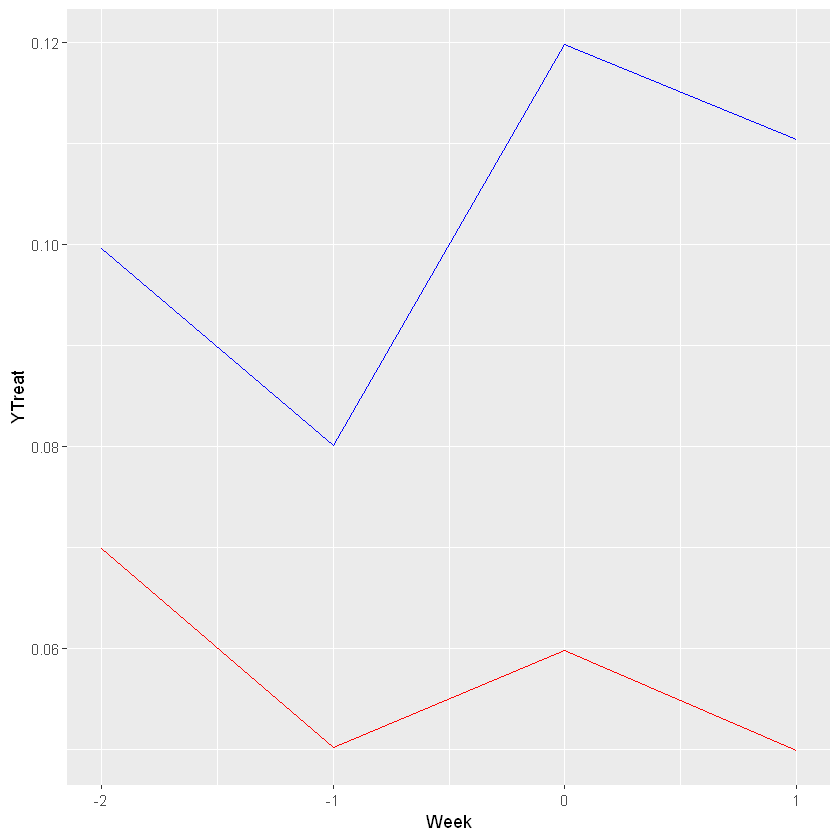

In [70]:
p = ggplot(df)+ aes(x=Week) + geom_line(aes(y= YTreat),colour='red') + geom_line(aes(y = YControl),colour='blue')
p

The blue line is the control group and red line is the treatment group

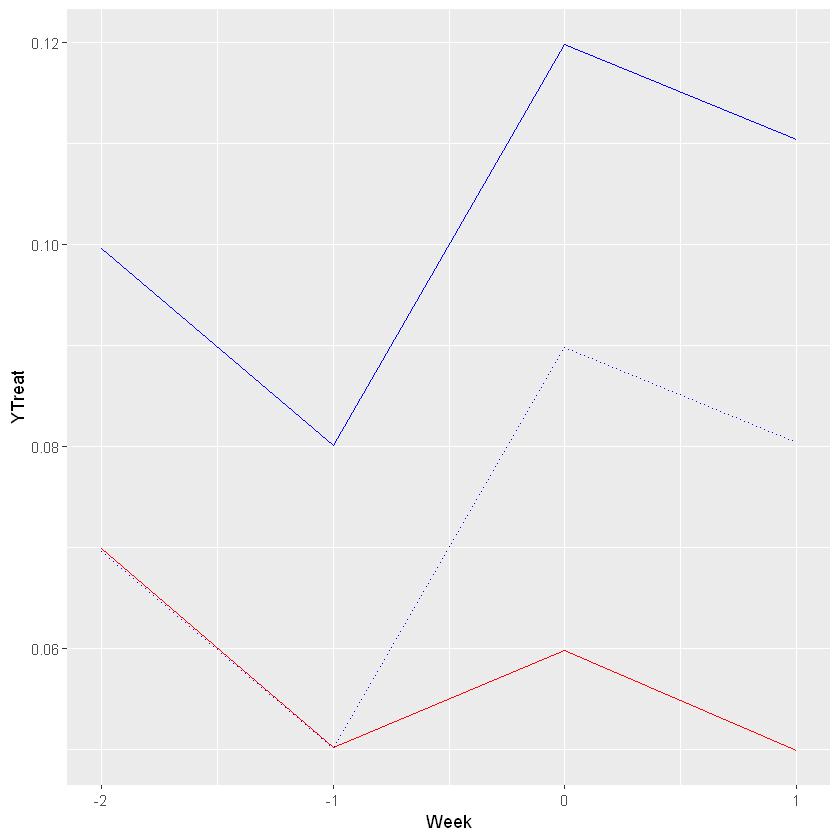

In [71]:
p = ggplot(df)+ aes(x=Week) + geom_line(aes(y= YTreat),colour='red') + geom_line(aes(y = YControl),colour='blue') +  geom_line(aes(y = YControl - 0.03),colour='blue',linetype = "dotted")
p

The red line is the treatment group